In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
particlesDict = {}

In [3]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [4]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [47]:
def cos_theta_distribuition(file_name,n_events = -1):
    cos_thetap = []
    cos_thetam = []
    for n,e in enumerate(pylheV.readLHE(file_name)):
        for ptc in e.particles:
            if ptc.status > 0:
                p_square = ptc.px**2 + ptc.py**2 + ptc.pz**2
                p = np.sqrt(p_square)
                cos = ptc.pz/p
                if ptc.id == -11:
                    cos_thetap.append(cos)
                else:
                    cos_thetam.append(cos)
        
        if n == n_events:
            return cos_thetap, cos_thetam
            
    
    return cos_thetap, cos_thetam
    
    
    

In [6]:
#This function calculates the invariant mass of a particle using the final particles
def invariant_mass(file_name):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        energy = 0
        px = 0
        py = 0
        pz = 0
        for ptc in e.particles:
            if ptc.status > 0:
                #Summing all components of final e+ and e-
                energy = energy + ptc.e
                px = px + ptc.px
                py = py + ptc.py
                pz = pz + ptc.pz
        
        #Calculating the invariant mass
        inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)
                
                    

        invariant_mass.append(inv_mass)

                
    return invariant_mass
   

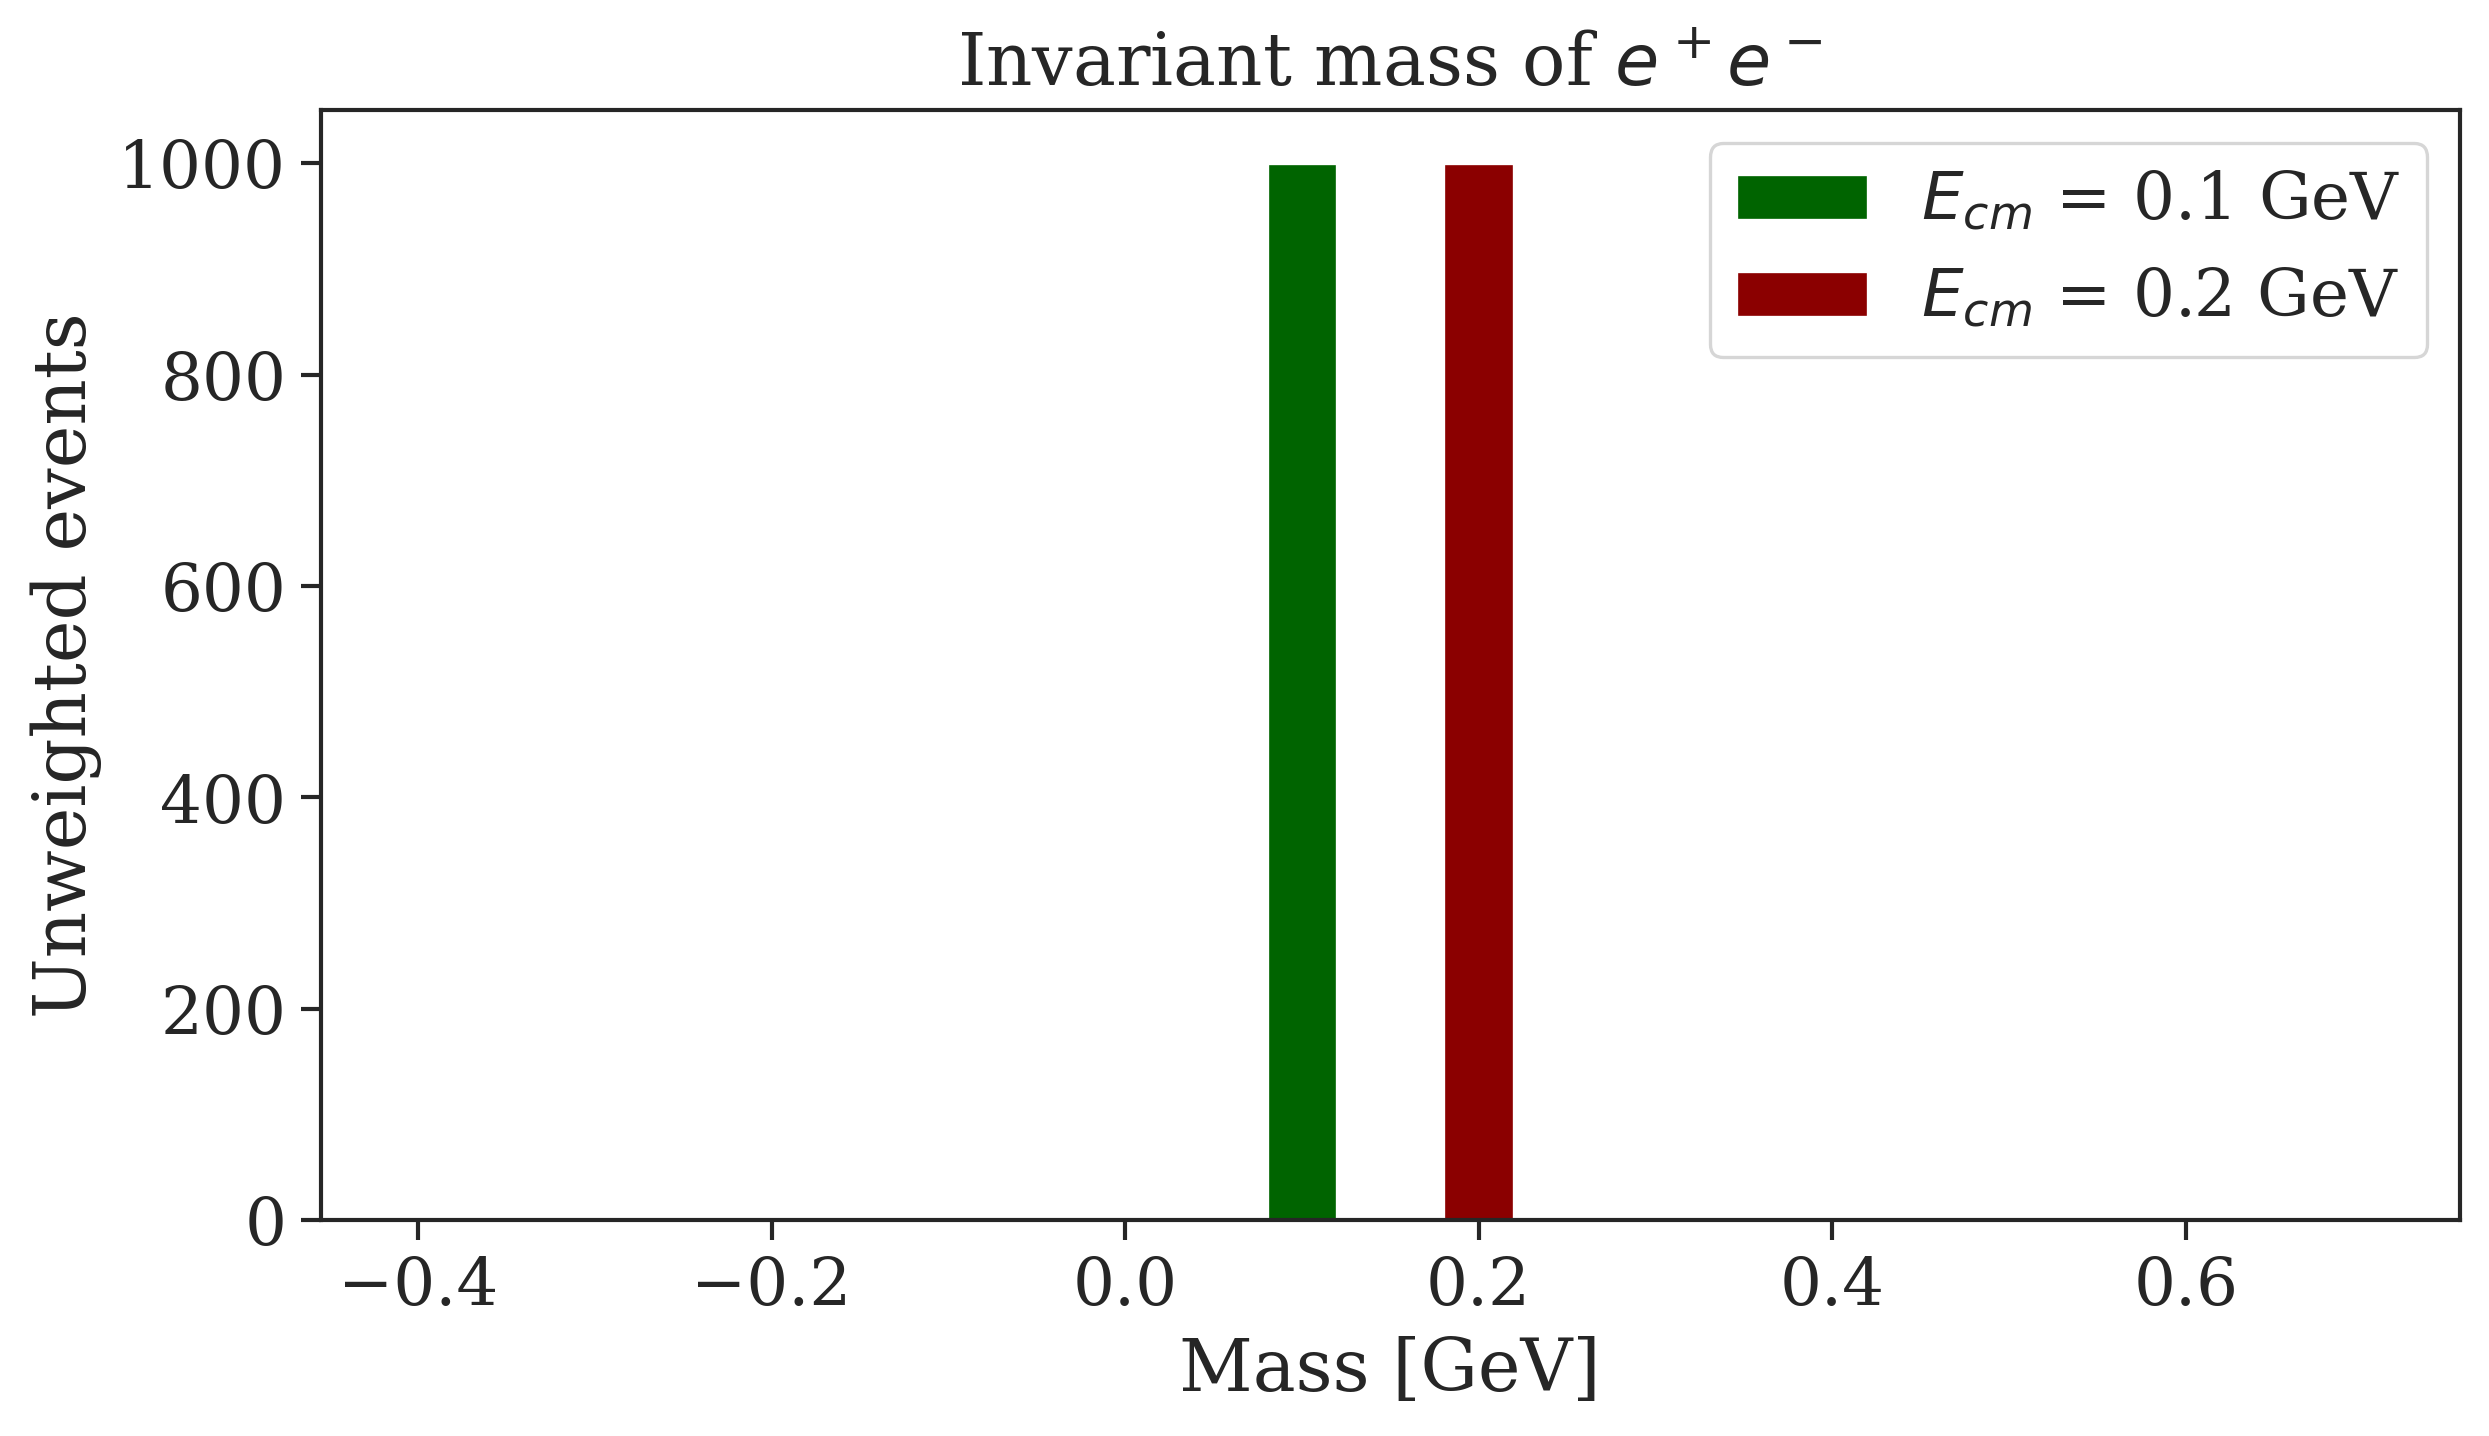

In [7]:
#Invariant mass plot
inv_mass_dot1GeV = invariant_mass('e+e-_dot1GeV_out.lhe')
inv_mass_dot2GeV = invariant_mass('e+e-_dot2GeV_out.lhe')
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(inv_mass_dot1GeV, bins = 25,  color = 'darkgreen',label =r'$E_{cm}$ = 0.1 GeV ')
histogram1 = plt.hist(inv_mass_dot2GeV, bins = 25, color = 'darkred',label =r'$E_{cm}$ = 0.2 GeV')


plt.xlabel(r'Mass [GeV]')
plt.title(r'Invariant mass of $e^+e^-$')
plt.ylabel(r'Unweighted events')
plt.legend()
plt.savefig('Invariant_mass_epem.pdf')
plt.show()

In [8]:
#Cross section and E_cm values

cross_section = [3.922e+09,3.558e+09,
3.242e+09, 2.966e+09,
2.724e+09, 2.51e+09 ,2.321e+09, 2.152e+09,2.001e+09,
1.865e+09,1.743e+09,  1.633e+09,
1.532e+09, 
1.441e+09,
1.357e+09,  
1.281e+09,1.211e+09,  1.146e+09,
1.086e+09, 1.031e+09,
9.806e+08]
e_cm = []
for i in range(21):
    e_cm.append(0.1+i*0.005)

alpha_square = 1/(137**2)

In [9]:
coeff = np.polyfit(e_cm,cross_section,2)
p = np.poly1d(coeff)

x = np.linspace(0.1, 0.2, 100)
print(coeff)

[ 2.79242177e+11 -1.10922523e+11  1.20852956e+10]


In [10]:
def func(x, a):
    return (a/(x**2))

In [11]:
popt, pcov = sc.optimize.curve_fit(func, e_cm, cross_section)
popt = popt/alpha_square
print(popt)

[7.36178833e+11]


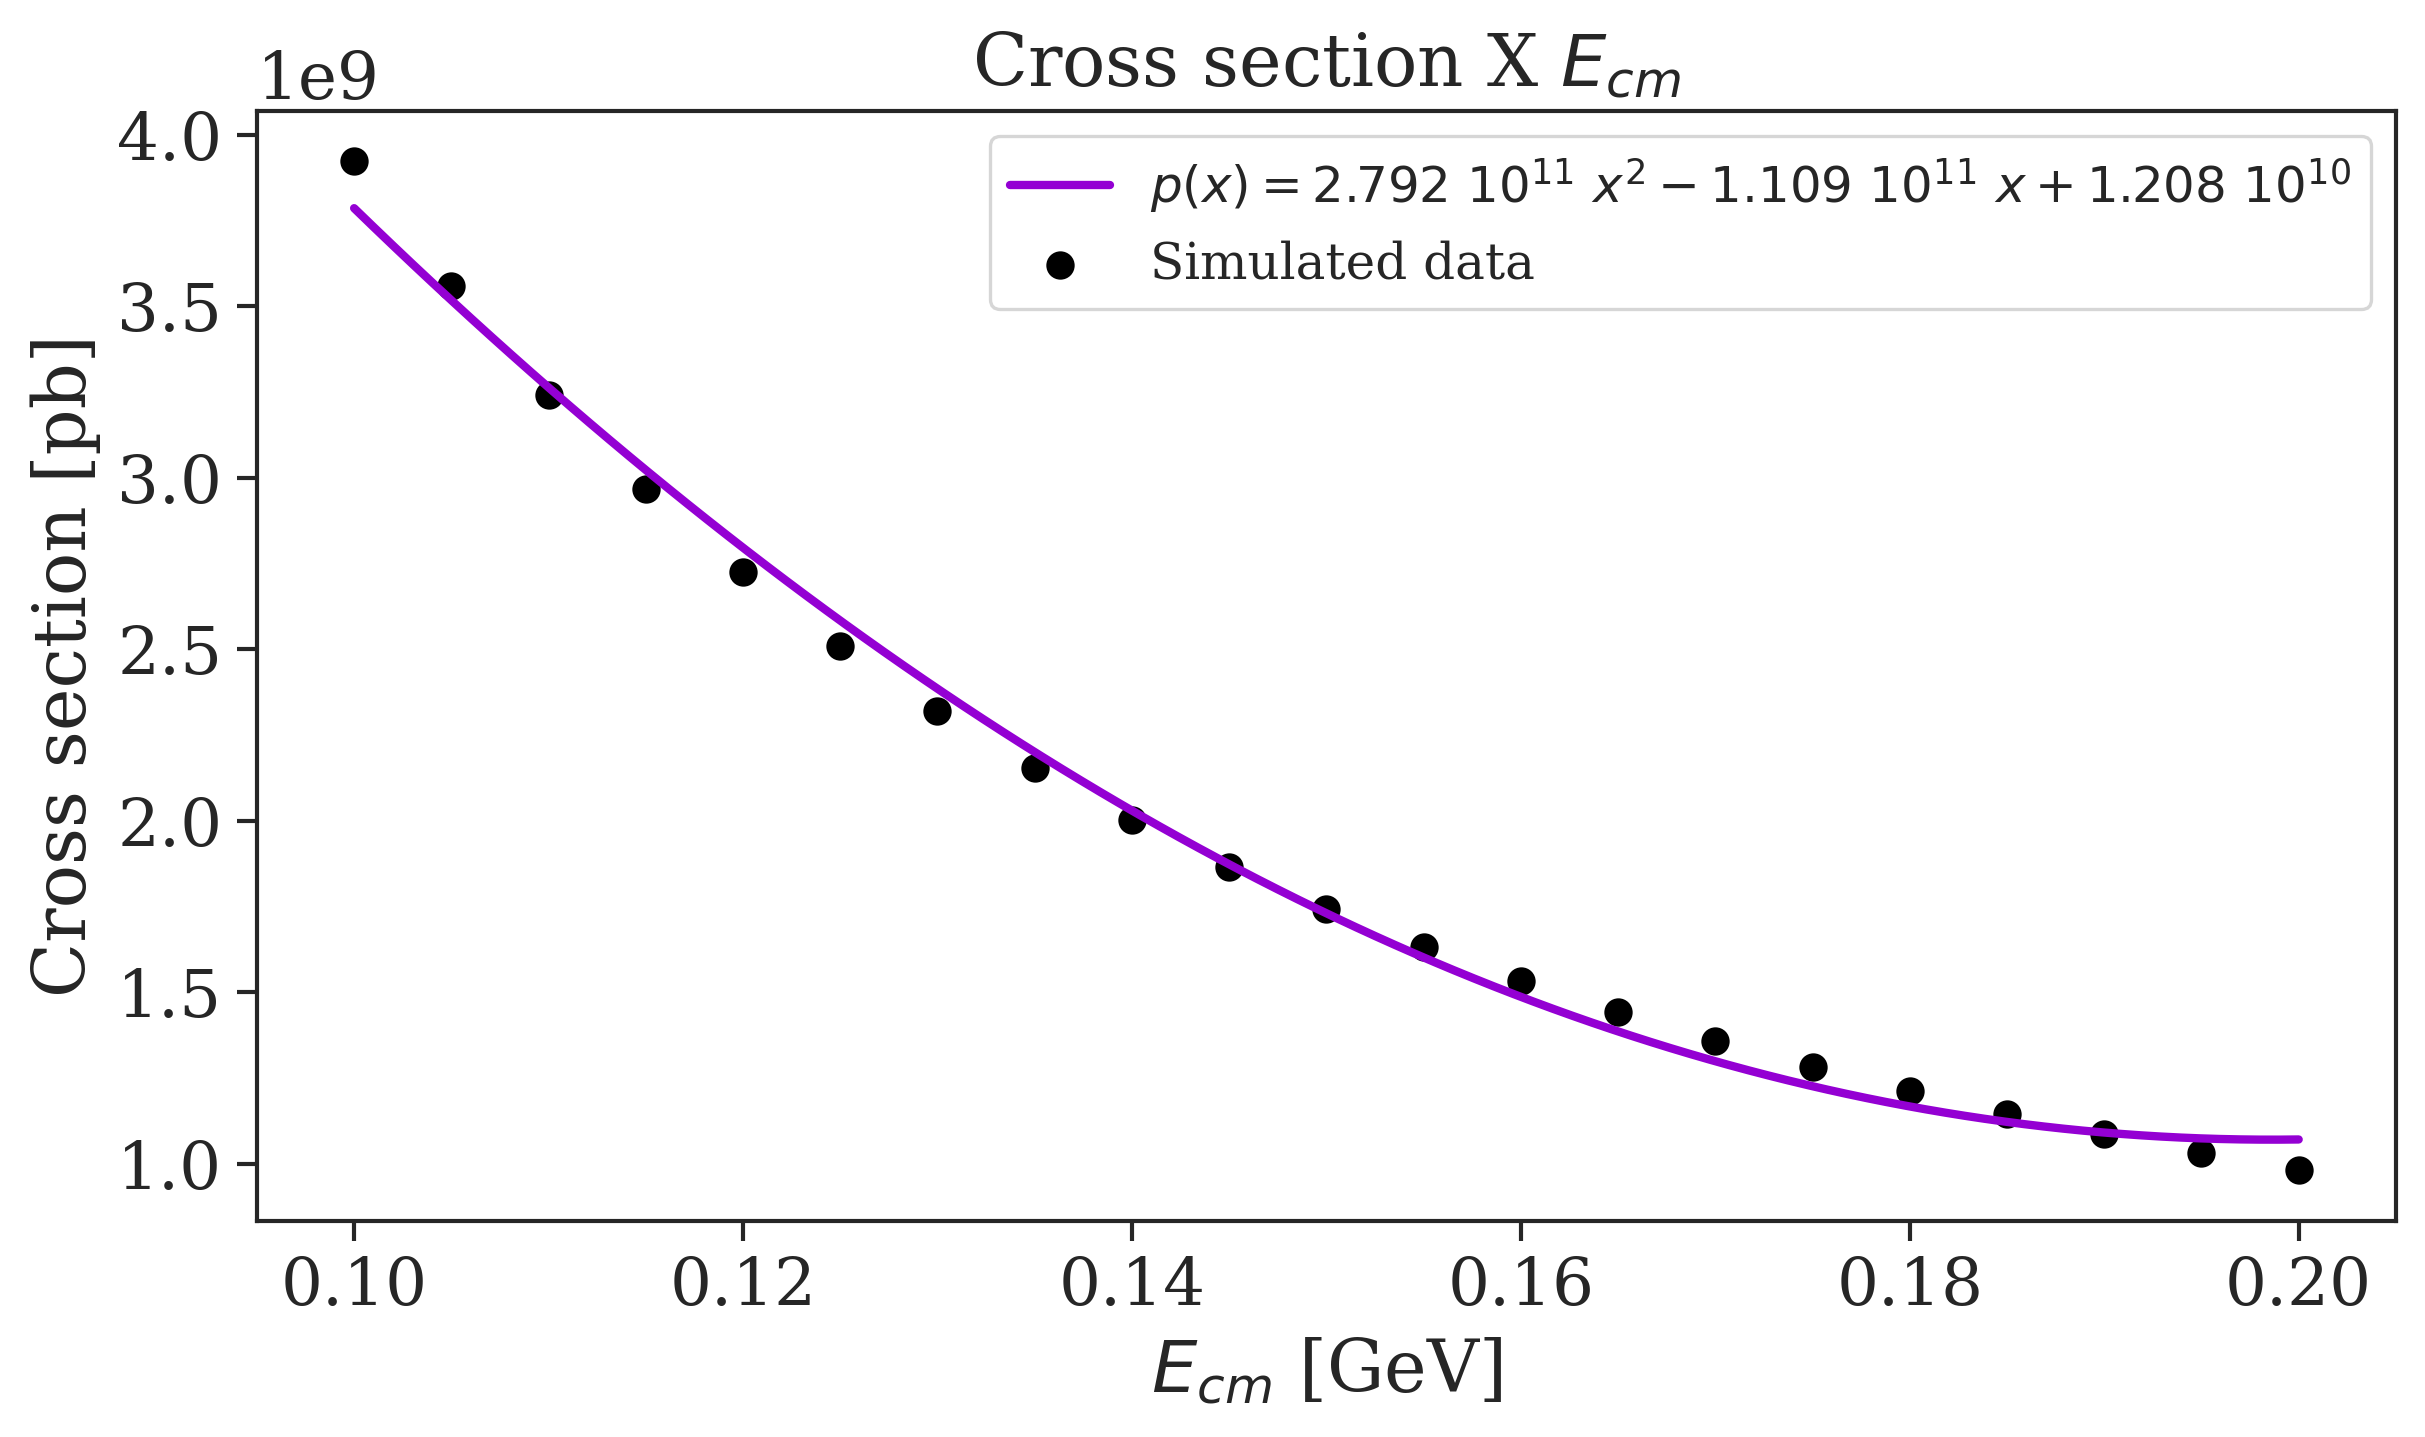

In [12]:
#Cross section X E_cm plot (polynomial fit)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.scatter(e_cm,cross_section, linewidth = 2, color = 'black',label = r'Simulated data')
plt.plot(x,p(x),linewidth = 2, color = 'darkviolet', label = r'$p(x) = 2.792 \ 10^{11} \ x^2 - 1.109 \ 10^{11} \ x + 1.208 \ 10^{10}  $')



plt.ylabel(r'Cross section [pb]')
plt.xlabel(r'$E_{cm}$ [GeV]')
plt.title(r'Cross section X $E_{cm}$')
plt.legend(fontsize = 12)
plt.savefig('CsXEcmq_epem.pdf')
plt.show()

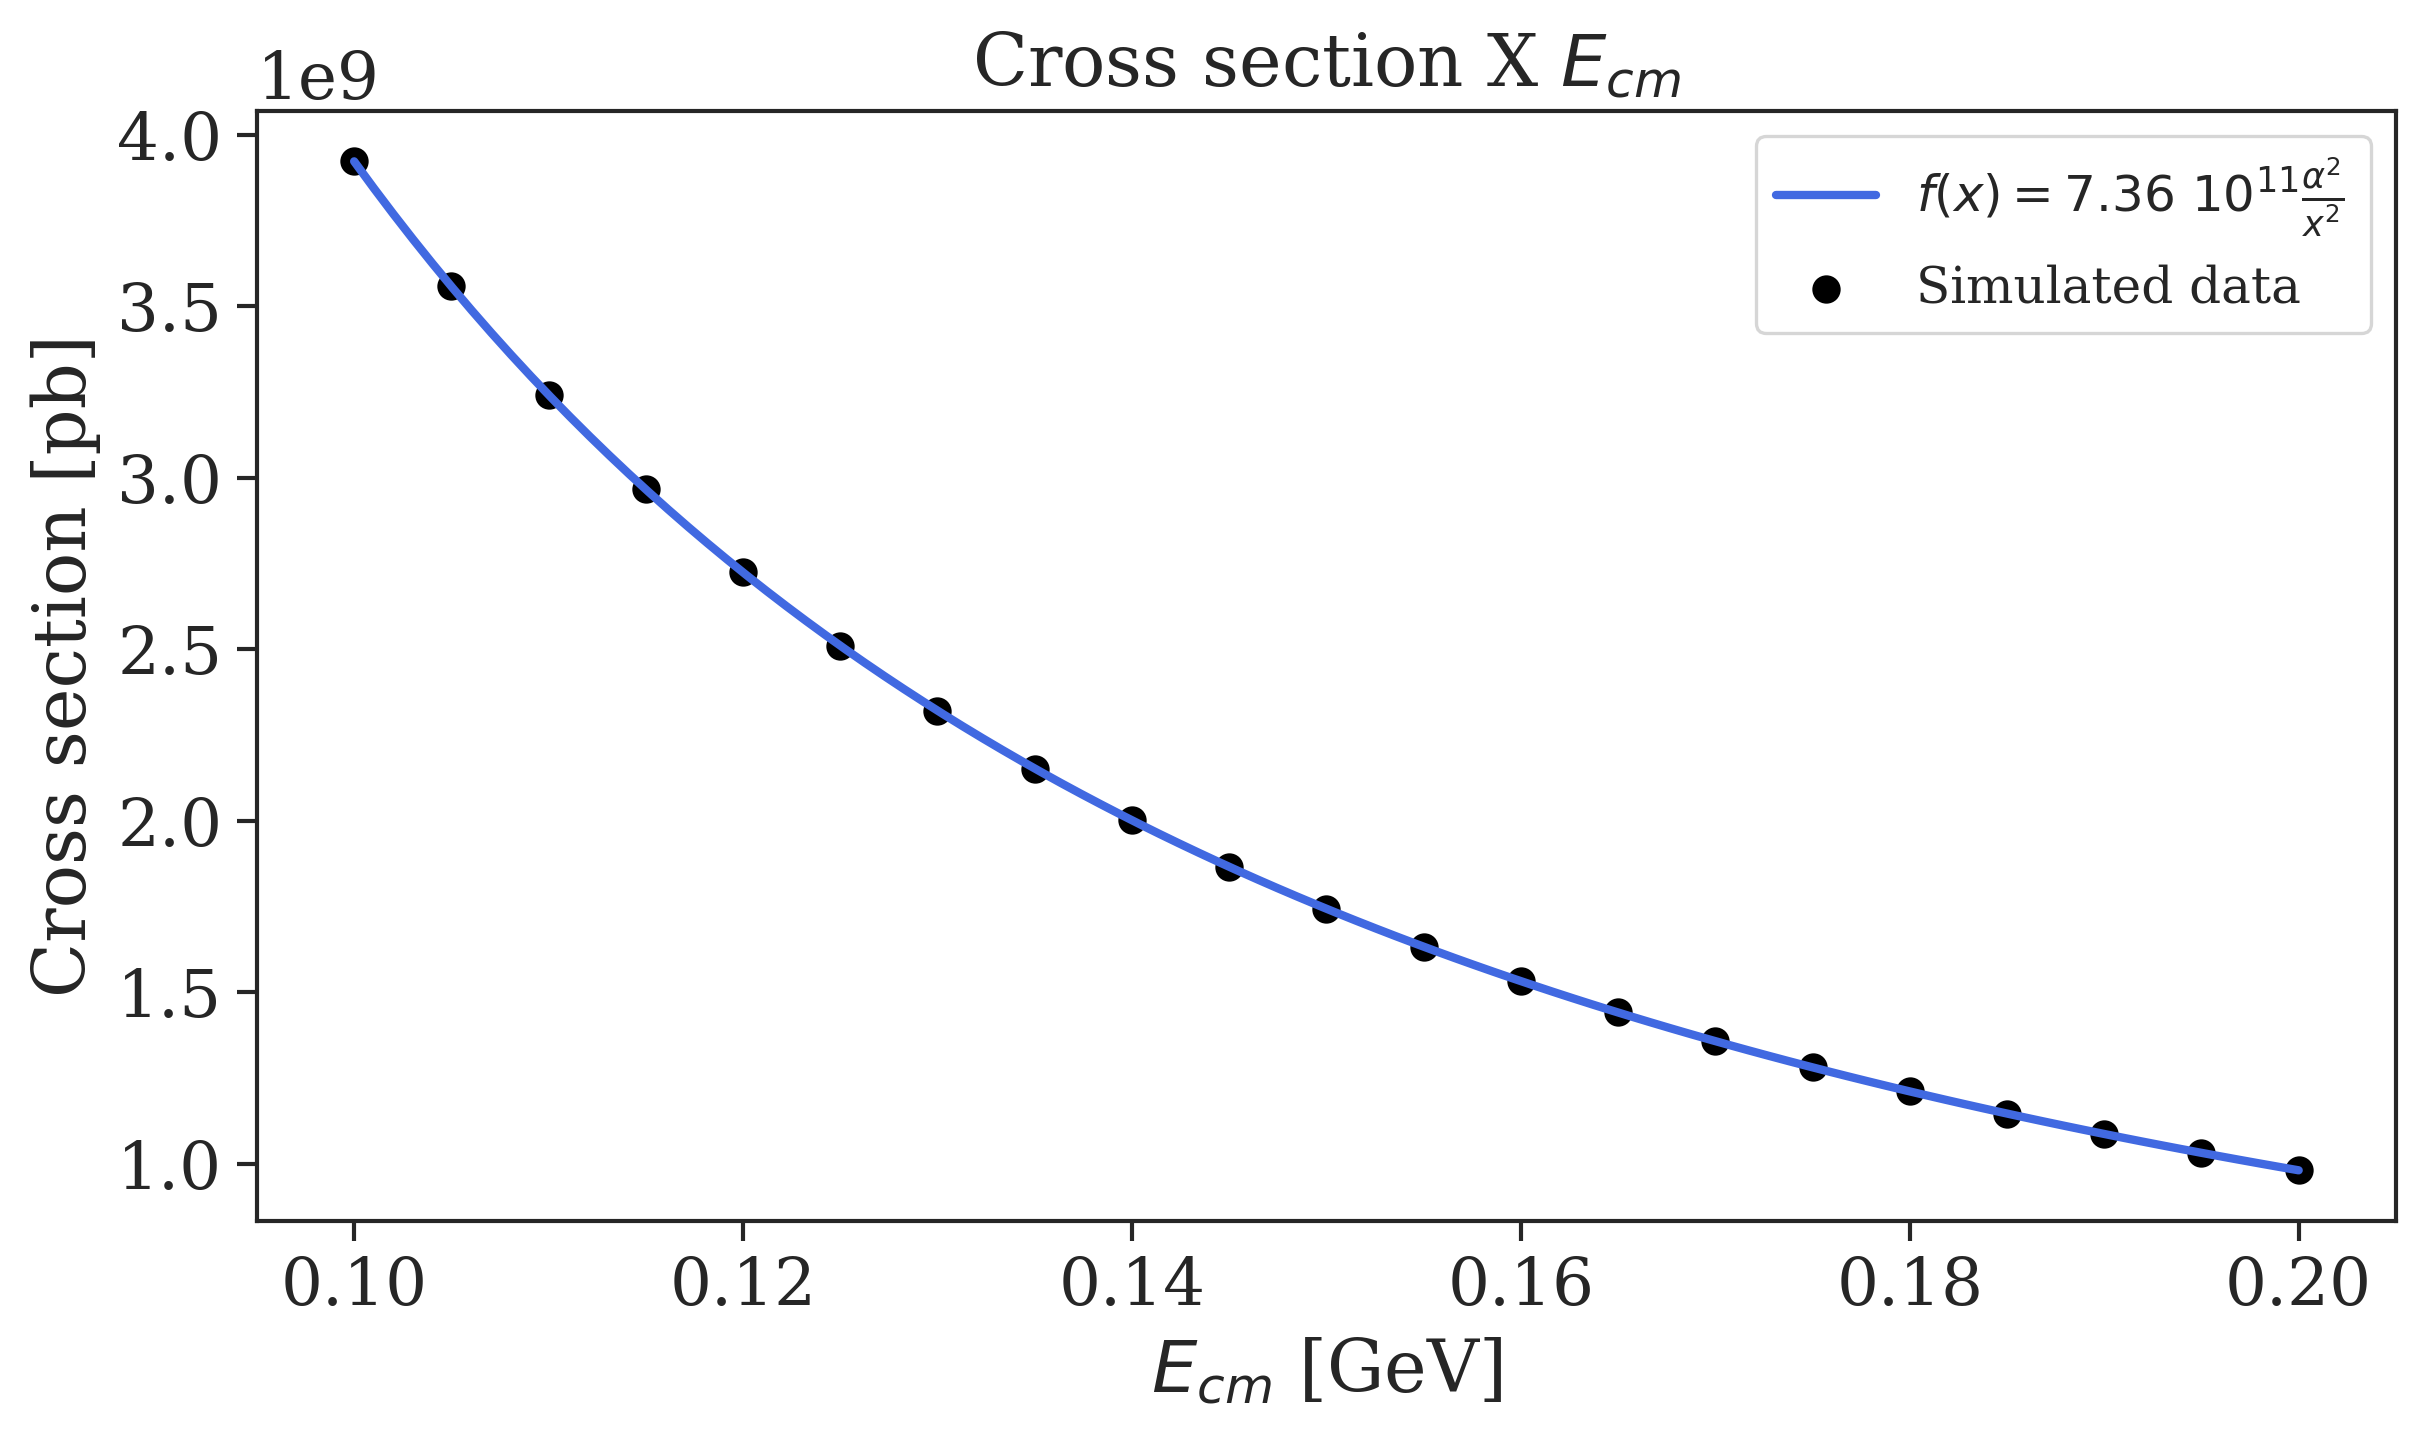

In [13]:
#Cross section X E_cm plot (1/x^2 fit)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.scatter(e_cm,cross_section, linewidth = 2, color = 'black',label = r'Simulated data')
plt.plot(x, func(x,*popt*alpha_square), linewidth = 2, color = 'royalblue', label = r'$f(x) = 7.36 \ 10^{11}\frac{\alpha^2}{x^2} $ ')


plt.ylabel(r'Cross section [pb]')
plt.xlabel(r'$E_{cm}$ [GeV]')
plt.title(r'Cross section X $E_{cm}$')
plt.legend(fontsize = 12)
plt.savefig('CsXEcm_epem.pdf')
plt.show()

In [179]:
theta_min = np.pi/18
eta_max = np.arctanh(np.cos(theta_min))
print(eta_max)

2.4362460537158763


In [180]:

E = 0.1


pT_min = theta_min*E/2
print('min theta =', theta_min, 'pT_min =', pT_min)

min theta = 0.17453292519943295 pT_min = 0.008726646259971648


In [241]:
def integrand(cos_theta):
    
    E = 0.1 #GeV
    alpha = (1/137)
    
    #cos^2(theta/2)
    cos_theta2_square = (1+cos_theta)/2

    #sen^2(theta/2)
    sen_theta2_square = (1-cos_theta)/2

    termo1 = (1+cos_theta**2)/2
    termo2 = (1+(cos_theta2_square**2))/(sen_theta2_square**2)
    termo3 = -2*(cos_theta2_square**2)/sen_theta2_square
    coeff1 = alpha**2/(8 *E**2)

    y1 = termo1+termo2+termo3
    y1 = 2*np.pi*coeff1*y1

    return y1*0.389389379372e9

In [242]:
def integrand1(cos_theta):
    
    E = 0.1 #GeV
    
    alpha = (1/137)
    coeff = alpha**2/(4*E**2)
    y = 2*np.pi*coeff/(((1-cos_theta)/2)**2)

    return y*0.389389379372e9 

In [245]:
#Rutherford scattering diferential cross section

E = 0.1 #GeV

cos_theta = np.arange(-1,np.cos(np.pi/18),0.00001)

iR = sc.integrate.quad(integrand1,-1,np.cos(theta_min))
print(iR)


alpha = (1/137)
coeff = alpha**2/(4*E**2)

coeff= coeff*0.389389379372e9

y = 4*2*np.pi*coeff/(((1-cos_theta)/2)**2)

(851509064.892783, 0.0035464669840337137)


In [246]:
#Bhabha scattering
i = sc.integrate.quad(integrand,-1,np.cos(theta_min))
print(i[0])

#cos^2(theta/2)
cos_theta2_square = (1+cos_theta)/2

#sen^2(theta/2)
sen_theta2_square = (1-cos_theta)/2

termo1 = (1+cos_theta**2)/2
termo2 = (1+(cos_theta2_square**2))/(sen_theta2_square**2)
termo3 = -2*(cos_theta2_square**2)/sen_theta2_square
coeff1 = alpha**2/(8 *E**2)

y1 = termo1+termo2+termo3
y1 =  4*2*np.pi*coeff1*y1*0.389379372e9


802954769.4513966


3428999999.99955


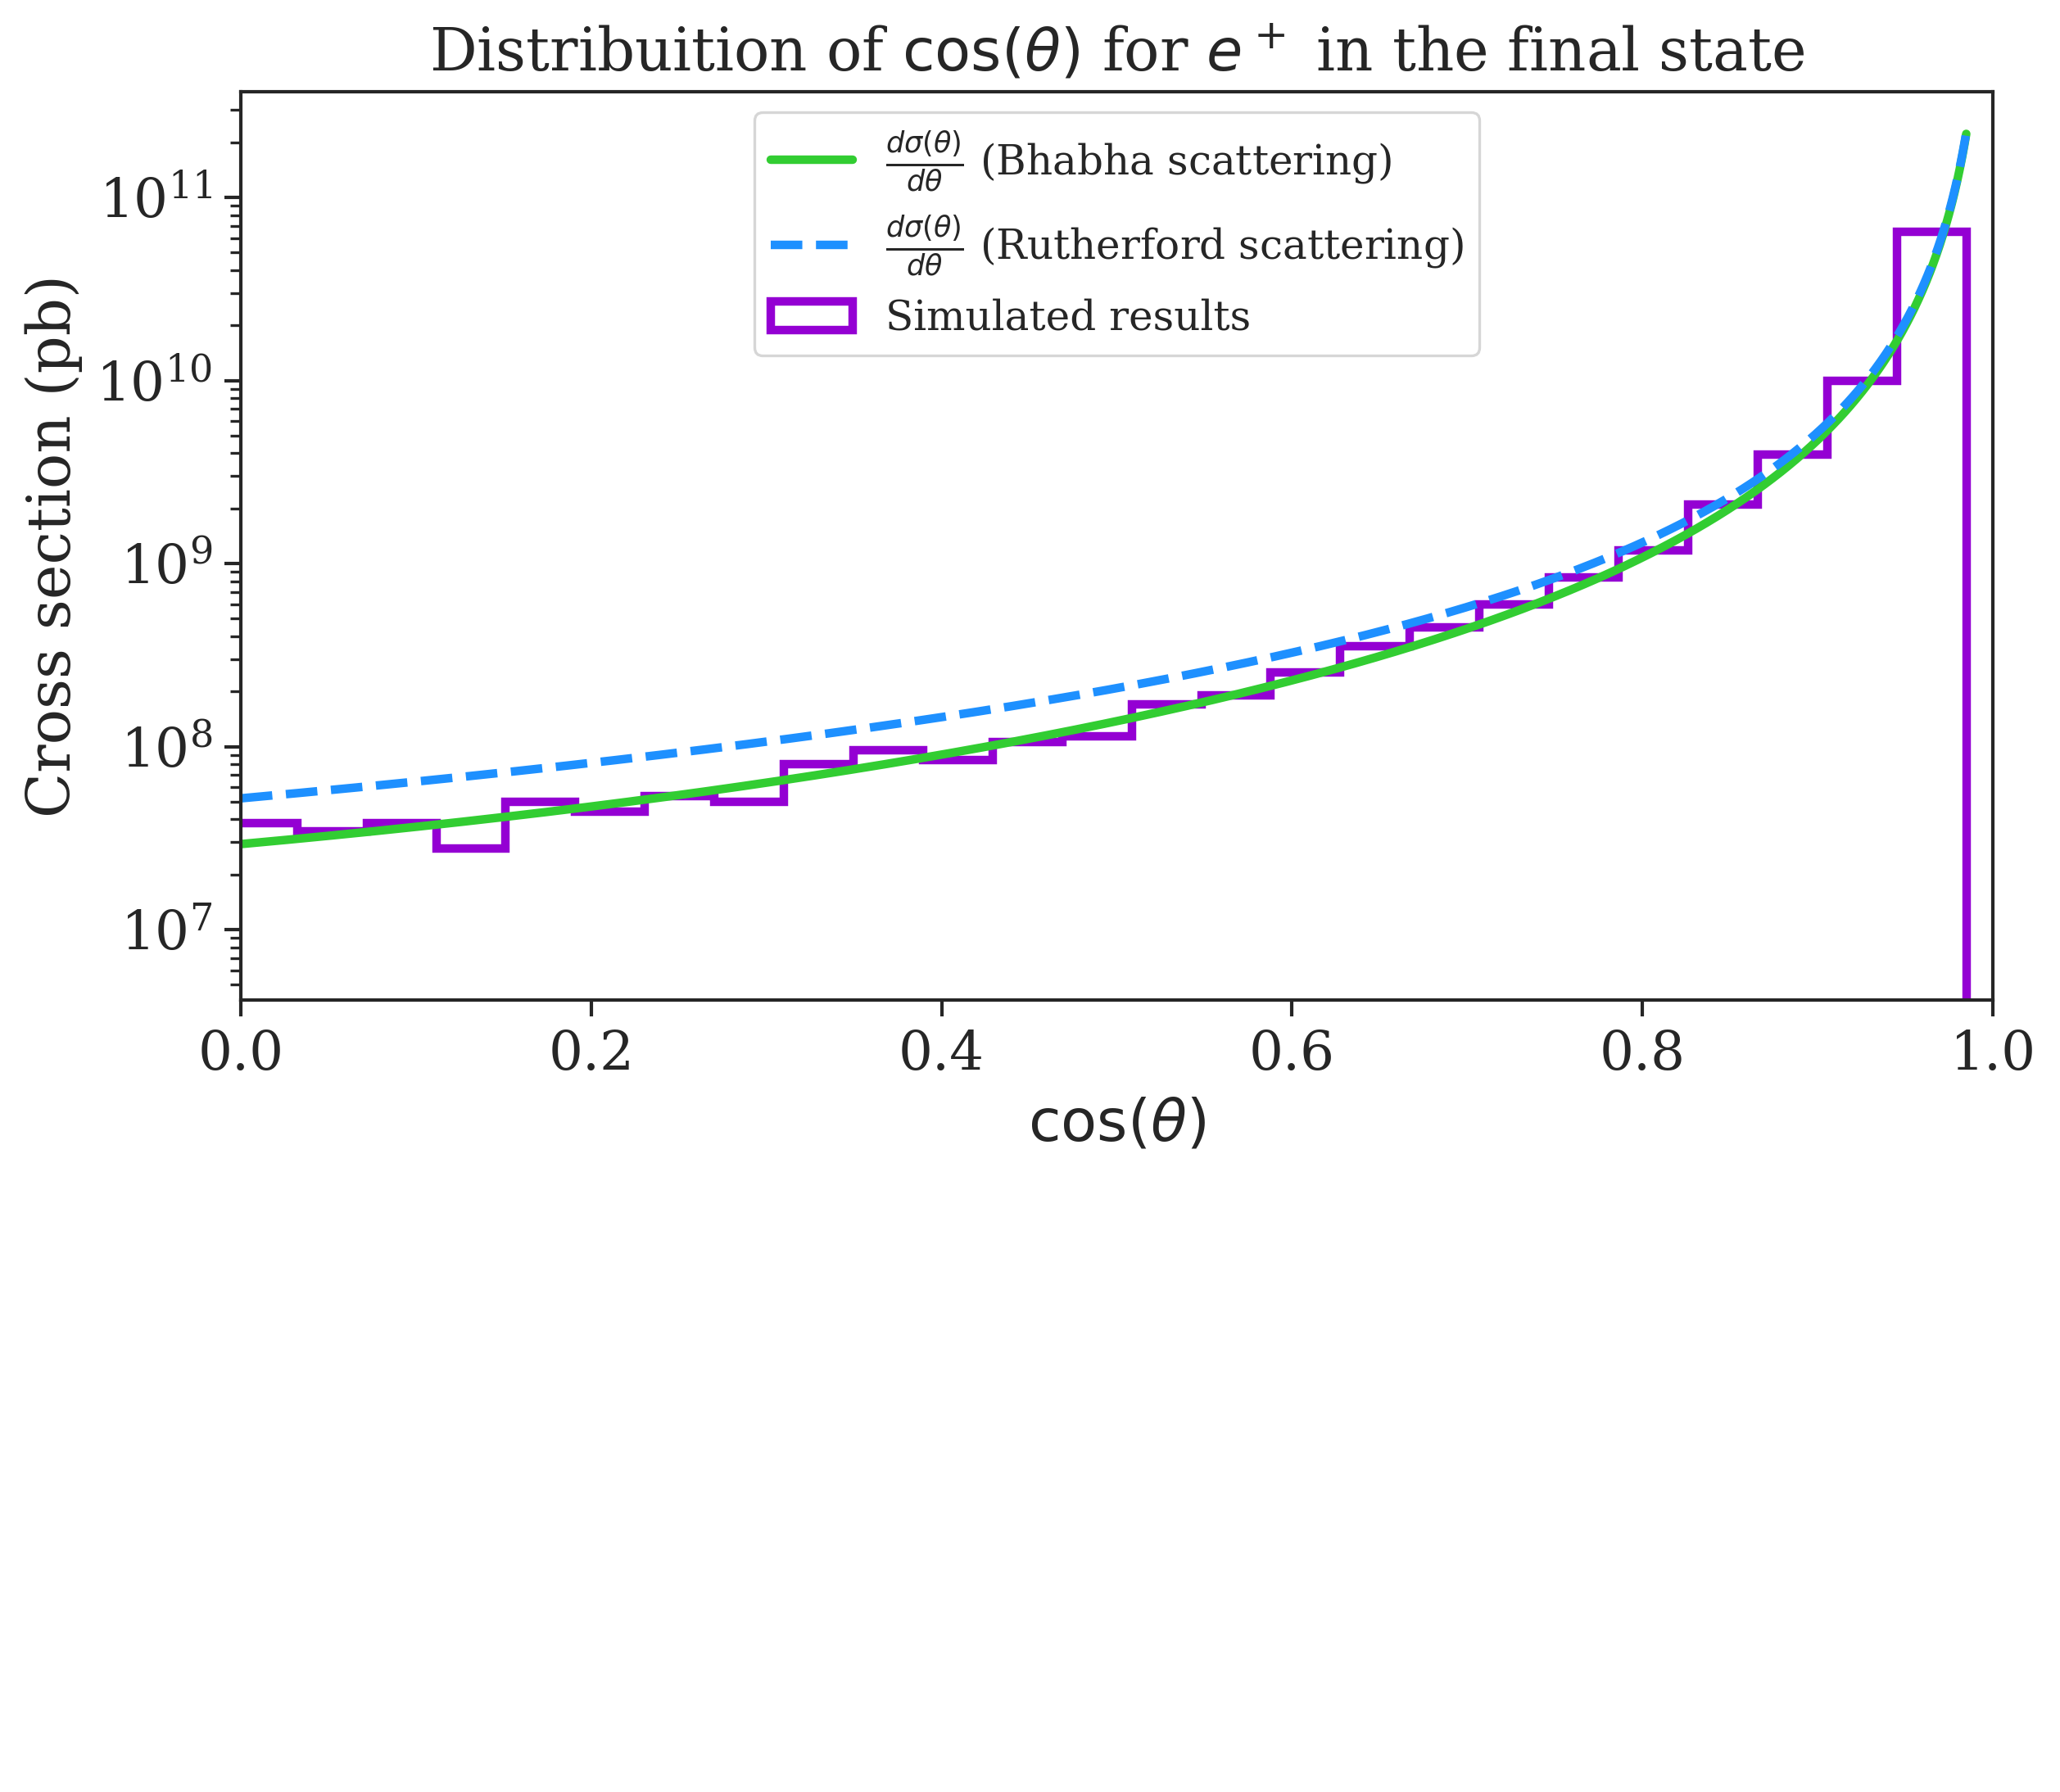

In [247]:

fig = plt.figure(figsize = [9.2,4.9], dpi = 300)


#Bhabha scattering
plot = plt.plot(cos_theta,y1,  color = 'limegreen', label = r'$\frac{d\sigma(\theta)}{d\theta}$ (Bhabha scattering)', linewidth = 2.5)

#Rutherford diferential cross section
plot = plt.plot(cos_theta,y, linestyle = '--', color = 'dodgerblue', label = r'$\frac{d\sigma(\theta)}{d\theta}$ (Rutherford scattering)', linewidth = 2.5)

#Simulated distribuition
cos_thetap1, cos_thetam1 = cos_theta_distribuition('epem_scat_uncut_out.lhe')

bin_width = (1+np.cos(theta_min))/50
weights =  np.array(100000*[3.429e+09/(bin_width*1e5)])


values, bins, _ = plt.hist(cos_thetap1, bins=50, range = [-1,np.cos(theta_min)],  histtype = 'step', linewidth =2.5,  weights = weights, color = 'darkviolet', label = r'Simulated results')
print(sum(np.diff(bins)*values))

plt.ylabel(r'Cross section (pb)')
plt.xlabel(r'$\cos{(\theta)}$')
plt.title(r'Distribuition of $\cos{(\theta)}$ for $e^+$ in the final state')
plt.annotate(r'$\sqrt{s} = 0.1$ GeV',(0.01,3e2), fontsize = 14)
plt.legend(loc ='upper center', fontsize = 12)
plt.xlim([0,1])
#plt.ylim([0.0001,1e4])
plt.yscale('log')


plt.savefig('cosT_distribution.pdf')
plt.show()

In [249]:
print(4*1e9 *2.0620869802519866*0.389379372 )


3211736533.5195794
